In [36]:
import pandas as pd

data = pd.read_csv('Iris-dataset.csv')
data.head()
y = data.pop('class')
print(y.shape)
print(y)

(150,)
0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object


In [37]:
y_transormed = y.copy()
y_transormed = y_transormed.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
print(y_transormed.shape)


(150,)


In [38]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y = encode.fit_transform(y)
print(y.shape)

(150,)


In [39]:
data.isnull().sum()

sepal_length    4
sepal_width     1
petal_length    3
petal_width     4
dtype: int64

In [40]:
data.T.isnull().any().sum()

11

In [41]:
from sklearn.impute import KNNImputer

mean = KNNImputer(n_neighbors=3)
X=mean.fit_transform(data)
#X was converted to an array from Datafram by fitting
print(X.shape)

(150, 4)


In [42]:
import numpy as np
N,p = np.shape(data)
classes = np.unique(y)
print("This dataset contains {} samples and {} features".format(N,p))
print("This target value contains {} classes".format(classes))
print("This target value contains {} classes".format(len(classes)))

This dataset contains 150 samples and 4 features
This target value contains [0 1 2] classes
This target value contains 3 classes


In [43]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,146.00000,149.000000,147.000000,146.000000
mean,5.84726,3.059732,3.804762,1.197260
std,0.83213,0.429317,1.752155,0.756849
min,4.30000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.600000,0.300000
50%,5.80000,3.000000,4.400000,1.300000
75%,6.40000,3.300000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


(150,)


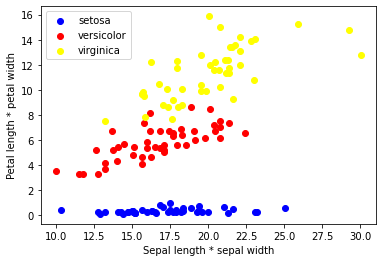

In [44]:
import matplotlib.pyplot as plt
sepal_area=data['sepal_length'] * data['sepal_width']
petal_area=data['petal_length'] * data['petal_width']
print(sepal_area.shape)
fig,ax = plt.subplots()
ax.scatter(sepal_area.loc[y==0],petal_area.loc[y==0], label='setosa',color='blue')
ax.scatter(sepal_area.loc[y==1],petal_area.loc[y==1], label='versicolor',color='red')
ax.scatter(sepal_area.loc[y==2],petal_area.loc[y==2], label='virginica',color='yellow')
ax.set_xlabel('Sepal length * sepal width')
ax.set_ylabel('Petal length * petal width')
ax.legend()
plt.show()

In [45]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',decision_function_shape ='ovr')

svm.fit(X,y)

SVC()

In [46]:
y_new = y.copy()
print(y_new)
y_new[y_new !=0]=1
print(y_new)

data_new=pd.DataFrame(data={'sepal_area':sepal_area ,'petal_area':petal_area})
data_new.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


,sepal_area,petal_area
0,17.85,0.28
1,14.70,0.28
2,15.04,0.26
3,14.26,0.30
4,18.00,NaN


In [47]:
NaN_index = data_new.T.isnull().any()
y_new=y_new[~NaN_index]
data_new=data_new.dropna(axis=0)
print(y_new)
print(len(data_new))
print(len(y_new))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
139
139


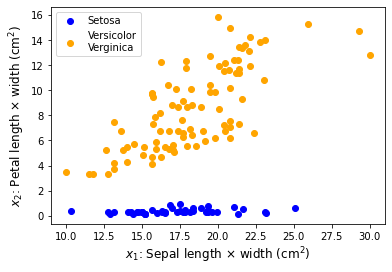

In [48]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(data_new.loc[y_new==0, 'sepal_area'], data_new.loc[y_new==0, 'petal_area'], label='Setosa', color='blue')
ax.scatter(data_new.loc[y_new==1, 'sepal_area'], data_new.loc[y_new==1, 'petal_area'], label='Versicolor\nVerginica', color='orange')

ax.set_xlabel(r'$x_1$: Sepal length $\times$ width (cm$^2$)', fontsize=12)
ax.set_ylabel(r'$x_2$: Petal length $\times$ width (cm$^2$)', fontsize=12)
ax.legend()
plt.show()

In [50]:
svm_linear_model= SVC(kernel='linear',decision_function_shape='ovr')
svm_linear_model.fit(data_new,y_new)

SVC(kernel='linear')

In [53]:
print(svm_linear_model.support_vectors_)

[[10.35  0.39]
 [17.5   0.96]
 [12.75  3.3 ]]


In [67]:
w1 =svm_linear_model.coef_[0,0]
w2 =svm_linear_model.coef_[0,1]
b =svm_linear_model.intercept_[0]
print("Parameters learned for the SVM classifier: ")
print("w1= {:.4f} w2= {:.4f} b= {:.4f}".format(w1, w2, b))

Parameters learned for the SVM classifier: 
w1= -0.0588 w2= 0.7354 b= -0.6780


In [71]:
print('Equation of the decision boundry:')
print("f(x) = ({:.4f})*x1 + ({:.4f})*x2 + {:.4f} = 0".format(w1, w2, b))

Equation of the decision boundry:
f(x) = (-0.0588)*x1 + (0.7354)*x2 + -0.6780 = 0


In [72]:
svm_accuracy= svm.score(X,y)
svm_linear_accuracy= svm_linear_model.score(data_new,y_new)
print('Training set accuracy of kernelized svm= {}'.format(svm_accuracy))
print('Training set accuracy of linear svm= {}'.format(svm_linear_accuracy))

Training set accuracy of kernelized svm= 0.98
Training set accuracy of linear svm= 1.0


(8.999, 31.021)
[ 8.999       9.44842857  9.89785714 10.34728571 10.79671429 11.24614286
 11.69557143 12.145      12.59442857 13.04385714 13.49328571 13.94271429
 14.39214286 14.84157143 15.291      15.74042857 16.18985714 16.63928571
 17.08871429 17.53814286 17.98757143 18.437      18.88642857 19.33585714
 19.78528571 20.23471429 20.68414286 21.13357143 21.583      22.03242857
 22.48185714 22.93128571 23.38071429 23.83014286 24.27957143 24.729
 25.17842857 25.62785714 26.07728571 26.52671429 26.97614286 27.42557143
 27.875      28.32442857 28.77385714 29.22328571 29.67271429 30.12214286
 30.57157143 31.021     ]


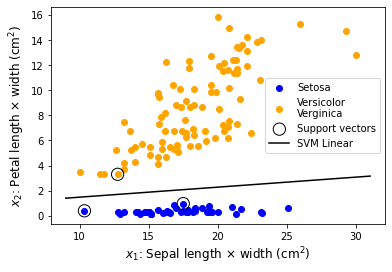

In [86]:
fig, ax = plt.subplots()
ax.scatter(data_new.loc[y_new==0, 'sepal_area'],data_new.loc[y_new==0, 'petal_area'], label='Setosa', color='blue')
ax.scatter(data_new.loc[y_new==1, 'sepal_area'],data_new.loc[y_new==1, 'petal_area'], label='Versicolor\nVerginica',color='orange')

ax.set_xlabel(r'$x_1$: Sepal length $\times$ width (cm$^2$)', fontsize=12)
ax.set_ylabel(r'$x_2$: Petal length $\times$ width (cm$^2$)', fontsize=12)

ax.scatter(svm_linear_model.support_vectors_[:,0],svm_linear_model.support_vectors_[:,1],marker='o',s=150,facecolors='none', edgecolor='black',label='Support vectors')

line_svm = lambda x:-(w1/w2)*x-b
x1_lim = ax.get_xlim()
print(x1_lim)
x1_range = np.linspace(x1_lim[0],x1_lim[1],50)
print(x1_range)
x2 = line_svm(x1_range)
ax.plot(x1_range,x2,color='black',label='SVM Linear')

ax.legend()
plt.show()